# CNN Convolutional Neural Networks
### From scratch

#### Convolution

 ![](conv.png)

#### Pooling

 ![](pooling.png)

#### CNN

 ![](convolution.png)

## Imports

In [5]:
from utilities.std_imports import *
import skimage
import sys

## 1. Relu activation

In [6]:
def Relu(featMap):
    reluOut = numpy.zeros(featMap.shape)
    maps = featMap.shape[-1]
    for m in range(maps):
        for r in numpy.arange(0,featMap.shape[0]):
            for c in numpy.arange(0, featMap.shape[1]):
                reluOut[r, c, m] = numpy.max([featMap[r, c, m], 0])
    return reluOut

## 2. Convolution and Pooling layers

In [7]:
# Convolution operation
def Conv(img, filter):
    # Checks: 1.  number of image channels matches the filter depth 2. filter dimensions are equal and 3. are odd
    if (len(img.shape) > 2 or len(filter.shape) > 3) and img.shape[-1] != filter.shape[-1]: print("Error: Number of channels in both image and filter must match."); sys.exit()
    if filter.shape[1] != filter.shape[2]: print('Error: Filter must be a square matrix. I.e. number of rows and columns must match.'); sys.exit()
    if filter.shape[1]%2==0: print('Error: Filter must have an odd size. I.e. number of rows and columns must be odd.'); sys.exit()

    featMaps = numpy.zeros((img.shape[0]-filter.shape[1]+1 , img.shape[1]-filter.shape[1]+1 , filter.shape[0]))

    # Convolving
    for f in range(filter.shape[0]):
        print("Filter ", f+1)
        currFilter = filter[f, :] 
        
        # Checking if there are mutliple channels for the single filter (to convolve in each channel)
        if len(currFilter.shape) > 2:
            convMap = conv(img[:, :, 0], currFilter[:, :, 0]) # Array holding the sum of all feature maps.
            for ch in range(1, currFilter.shape[-1]): 
                convMap = convMap + conv(img[:, :, ch], currFilter[:, :, ch])
        else: 
            convMap = conv(img, currFilter)
        featMaps[:, :, f] = convMap 
    return featMaps    

# Pooling operation
def Pooling(featMap, size=2, stride=2):
    poolOut = numpy.zeros((numpy.uint16((featMap.shape[0]-size+1)/stride+1) , numpy.uint16((featMap.shape[1]-size+1)/stride+1), featMap.shape[-1]))
    for map_num in range(featMap.shape[-1]):
        r2 = 0
        for r in numpy.arange(0,featMap.shape[0]-size+1, stride):
            c2 = 0
            for c in numpy.arange(0, featMap.shape[1]-size+1, stride):
                poolOut[r2, c2, map_num] = numpy.max([featMap[r:r+size,  c:c+size]])
                c2 += 1
            r2 += 1
    return poolOut

## 3. Build the network

In [8]:
def conv(img, filter):
    filterSize = filter.shape[1]
    featMap = numpy.zeros((img.shape))
    # Convolution operation in the image
    for r in numpy.uint16(numpy.arange(filterSize/2.0, img.shape[0] - filterSize/2.0 + 1)):
        for c in numpy.uint16(numpy.arange(filterSize/2.0, img.shape[1] - filterSize/2.0 + 1)):
            # Getting the current region to apply the filter
            floor = numpy.uint16(numpy.floor(filterSize/2.0))
            ceil = numpy.uint16(numpy.ceil(filterSize/2.0))
            currRegion = img[r-floor:r+ceil , c-floor:c+ceil]
            
            # Element-wise product 
            currRes = currRegion * filter
            convSum = numpy.sum(currRes)
            featMap[r, c] = convSum 
            
    # Clipping the outliers
    halfFilterSize = numpy.uint16(filterSize/2.0)
    return featMap[halfFilterSize:featMap.shape[0]-halfFilterSize , halfFilterSize:featMap.shape[1]-halfFilterSize]

## Test


Working with conv layer 1
Filter  1
Filter  2

ReLU

Pooling
End of conv layer 1


Working with conv layer 2
Filter  1
Filter  2
Filter  3

ReLU

Pooling
End of conv layer 2


Working with conv layer 3
Filter  1

ReLU

Pooling
End of conv layer 3



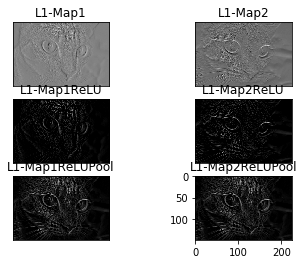

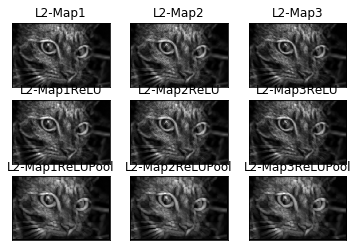

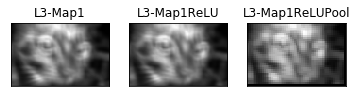

In [11]:
# Load image
img = skimage.data.chelsea()
#img = skimage.data.camera()

# Converting the image into gray.
img = skimage.color.rgb2gray(img)

# 1st convolution layer
l1Filter = numpy.zeros((2,3,3))
l1Filter[0, :, :] = numpy.array([[[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]])
l1Filter[1, :, :] = numpy.array([[[1, 1, 1], [0, 0, 0], [-1, -1, -1]]])

print("\nWorking with conv layer 1")
l1FeatureMap = Conv(img, l1Filter)

print("\nReLU")
l1FeatureMapRelu = Relu(l1FeatureMap)
print("\nPooling")
l1FeatureMapReluPool = Pooling(l1FeatureMapRelu, 2, 2)
print("End of conv layer 1\n")

# 2nd convolution layer
l2Filter = numpy.random.rand(3, 5, 5, l1FeatureMapReluPool.shape[-1])

print("\nWorking with conv layer 2")
l2FeatureMap = Conv(l1FeatureMapReluPool, l2Filter)
print("\nReLU")
l2FeatureMapRelu = Relu(l2FeatureMap)
print("\nPooling")
l2FeatureMapReluPool = Pooling(l2FeatureMapRelu, 2, 2)
print("End of conv layer 2\n")

# 3rd convolution layer
l3_filter = numpy.random.rand(1, 7, 7, l2FeatureMapReluPool.shape[-1])

print("\nWorking with conv layer 3")
l3_featureMap = Conv(l2FeatureMapReluPool, l3_filter)
print("\nReLU")
l3FeatureMapRelu = Relu(l3_featureMap)
print("\nPooling")
l3FeatureMapReluPool = Pooling(l3FeatureMapRelu, 2, 2)
print("End of conv layer 3\n")

# Show results
fig0, ax0 = plt.subplots(nrows=1, ncols=1)
ax0.imshow(img).set_cmap("gray")
ax0.set_title("Input Image")
ax0.get_xaxis().set_ticks([])
ax0.get_yaxis().set_ticks([])
plt.savefig("in_img.png", bbox_inches="tight")
plt.close(fig0)

# Layer 1
fig1, ax1 = plt.subplots(nrows=3, ncols=2)
ax1[0, 0].imshow(l1FeatureMap[:, :, 0]).set_cmap("gray")
ax1[0, 0].get_xaxis().set_ticks([])
ax1[0, 0].get_yaxis().set_ticks([])
ax1[0, 0].set_title("L1-Map1")

ax1[0, 1].imshow(l1FeatureMap[:, :, 1]).set_cmap("gray")
ax1[0, 1].get_xaxis().set_ticks([])
ax1[0, 1].get_yaxis().set_ticks([])
ax1[0, 1].set_title("L1-Map2")

ax1[1, 0].imshow(l1FeatureMapRelu[:, :, 0]).set_cmap("gray")
ax1[1, 0].get_xaxis().set_ticks([])
ax1[1, 0].get_yaxis().set_ticks([])
ax1[1, 0].set_title("L1-Map1ReLU")

ax1[1, 1].imshow(l1FeatureMapRelu[:, :, 1]).set_cmap("gray")
ax1[1, 1].get_xaxis().set_ticks([])
ax1[1, 1].get_yaxis().set_ticks([])
ax1[1, 1].set_title("L1-Map2ReLU")

ax1[2, 0].imshow(l1FeatureMapReluPool[:, :, 0]).set_cmap("gray")
ax1[2, 0].get_xaxis().set_ticks([])
ax1[2, 0].get_yaxis().set_ticks([])
ax1[2, 0].set_title("L1-Map1ReLUPool")

ax1[2, 1].imshow(l1FeatureMapReluPool[:, :, 1]).set_cmap("gray")
ax1[2, 0].get_xaxis().set_ticks([])
ax1[2, 0].get_yaxis().set_ticks([])
ax1[2, 1].set_title("L1-Map2ReLUPool")

#plt.savefig("L1.png", bbox_inches="tight"); plt.close(fig1)
plt.show()

# Layer 2
fig2, ax2 = plt.subplots(nrows=3, ncols=3)
ax2[0, 0].imshow(l2FeatureMap[:, :, 0]).set_cmap("gray")
ax2[0, 0].get_xaxis().set_ticks([])
ax2[0, 0].get_yaxis().set_ticks([])
ax2[0, 0].set_title("L2-Map1")

ax2[0, 1].imshow(l2FeatureMap[:, :, 1]).set_cmap("gray")
ax2[0, 1].get_xaxis().set_ticks([])
ax2[0, 1].get_yaxis().set_ticks([])
ax2[0, 1].set_title("L2-Map2")

ax2[0, 2].imshow(l2FeatureMap[:, :, 2]).set_cmap("gray")
ax2[0, 2].get_xaxis().set_ticks([])
ax2[0, 2].get_yaxis().set_ticks([])
ax2[0, 2].set_title("L2-Map3")

ax2[1, 0].imshow(l2FeatureMapRelu[:, :, 0]).set_cmap("gray")
ax2[1, 0].get_xaxis().set_ticks([])
ax2[1, 0].get_yaxis().set_ticks([])
ax2[1, 0].set_title("L2-Map1ReLU")

ax2[1, 1].imshow(l2FeatureMapRelu[:, :, 1]).set_cmap("gray")
ax2[1, 1].get_xaxis().set_ticks([])
ax2[1, 1].get_yaxis().set_ticks([])
ax2[1, 1].set_title("L2-Map2ReLU")

ax2[1, 2].imshow(l2FeatureMapRelu[:, :, 2]).set_cmap("gray")
ax2[1, 2].get_xaxis().set_ticks([])
ax2[1, 2].get_yaxis().set_ticks([])
ax2[1, 2].set_title("L2-Map3ReLU")

ax2[2, 0].imshow(l2FeatureMapReluPool[:, :, 0]).set_cmap("gray")
ax2[2, 0].get_xaxis().set_ticks([])
ax2[2, 0].get_yaxis().set_ticks([])
ax2[2, 0].set_title("L2-Map1ReLUPool")

ax2[2, 1].imshow(l2FeatureMapReluPool[:, :, 1]).set_cmap("gray")
ax2[2, 1].get_xaxis().set_ticks([])
ax2[2, 1].get_yaxis().set_ticks([])
ax2[2, 1].set_title("L2-Map2ReLUPool")

ax2[2, 2].imshow(l2FeatureMapReluPool[:, :, 2]).set_cmap("gray")
ax2[2, 2].get_xaxis().set_ticks([])
ax2[2, 2].get_yaxis().set_ticks([])
ax2[2, 2].set_title("L2-Map3ReLUPool")


#plt.savefig("L2.png", bbox_inches="tight"); plt.close(fig2)
plt.show()

# Layer 3
fig3, ax3 = plt.subplots(nrows=1, ncols=3)
ax3[0].imshow(l3_featureMap[:, :, 0]).set_cmap("gray")
ax3[0].get_xaxis().set_ticks([])
ax3[0].get_yaxis().set_ticks([])
ax3[0].set_title("L3-Map1")

ax3[1].imshow(l3FeatureMapRelu[:, :, 0]).set_cmap("gray")
ax3[1].get_xaxis().set_ticks([])
ax3[1].get_yaxis().set_ticks([])
ax3[1].set_title("L3-Map1ReLU")

ax3[2].imshow(l3FeatureMapReluPool[:, :, 0]).set_cmap("gray")
ax3[2].get_xaxis().set_ticks([])
ax3[2].get_yaxis().set_ticks([])
ax3[2].set_title("L3-Map1ReLUPool")

#plt.savefig("L3.png", bbox_inches="tight"); plt.close(fig3)
plt.show()

## Credits & Links

https://medium.com/machine-learning-bites/deeplearning-series-convolutional-neural-networks-a9c2f2ee1524